In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("MVO.csv", header = 0, index_col= 0)

In [4]:
df.head()

,SPY,IWN,LQD,XNTK,XLE,SPGSCITR Index,EEM,DIA,AAPL
Date,,,,,,,,,
12/30/2005,124.51,65.93,107.69,25.95,50.31,6627.92,29.42,106.95,10.27
1/3/2006,126.70,67.23,108.28,26.44,52.70,6729.99,30.52,108.33,10.68
1/4/2006,127.30,67.57,108.28,26.74,52.85,6736.52,30.79,108.74,10.71
1/5/2006,127.38,67.80,108.37,26.95,52.18,6638.18,30.95,108.88,10.63
1/6/2006,128.44,68.39,108.20,27.53,53.46,6728.18,31.60,109.52,10.90


## Preprocessing: transform data to log return series

In [44]:
#Compute Log Returns
log_return = np.log(df).diff()  # arith_return = df.pct_change()
log_return.dropna(axis = 0, inplace = True) #remove first row
col_names = log_return.columns
log_return.head()
log_return.tail()

,SPY,IWN,LQD,XNTK,XLE,SPGSCITR Index,EEM,DIA,AAPL
Date,,,,,,,,,
4/16/2018,0.008188,0.009414,0.000085,0.006465,0.010171,-0.007994,0.001261,0.008340,0.006219
4/17/2018,0.010642,0.006386,0.000085,0.023497,0.003874,0.000784,0.002097,0.008836,0.013670
4/18/2018,0.000740,0.002622,-0.005142,-0.001303,0.015619,0.021174,0.008553,-0.001696,-0.002247
4/19/2018,-0.005563,-0.003100,-0.003788,-0.016544,0.001223,-0.001525,-0.005833,-0.003280,-0.028749
4/20/2018,-0.008515,-0.003749,-0.004062,-0.014914,-0.004764,-0.000498,-0.012616,-0.008512,-0.041835


# All in One Code

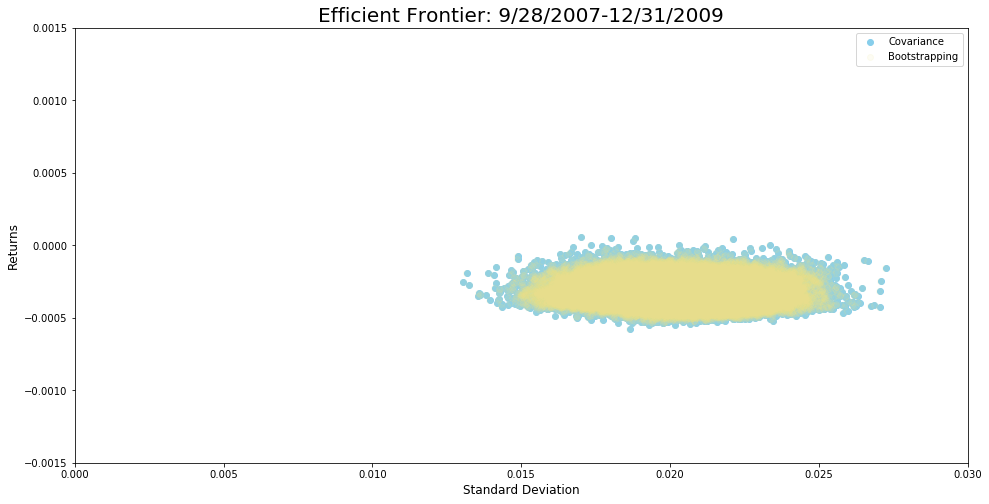

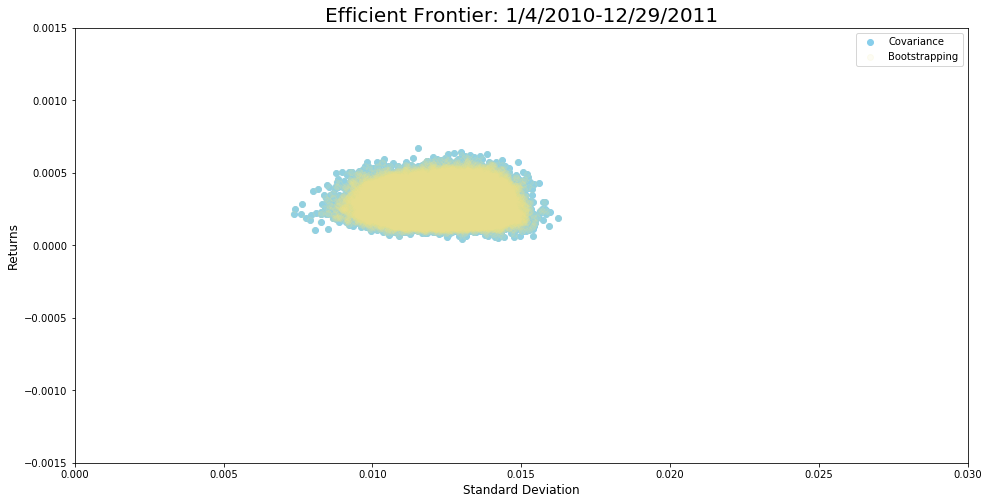

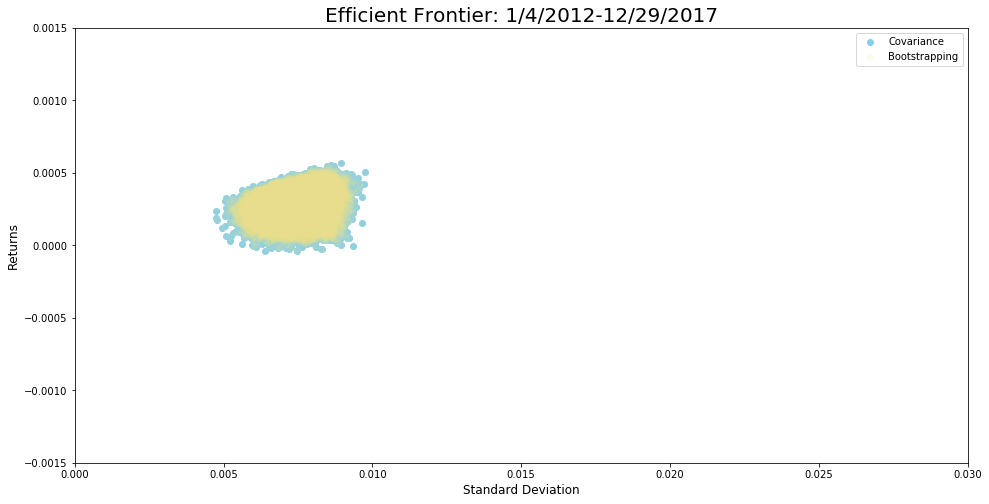

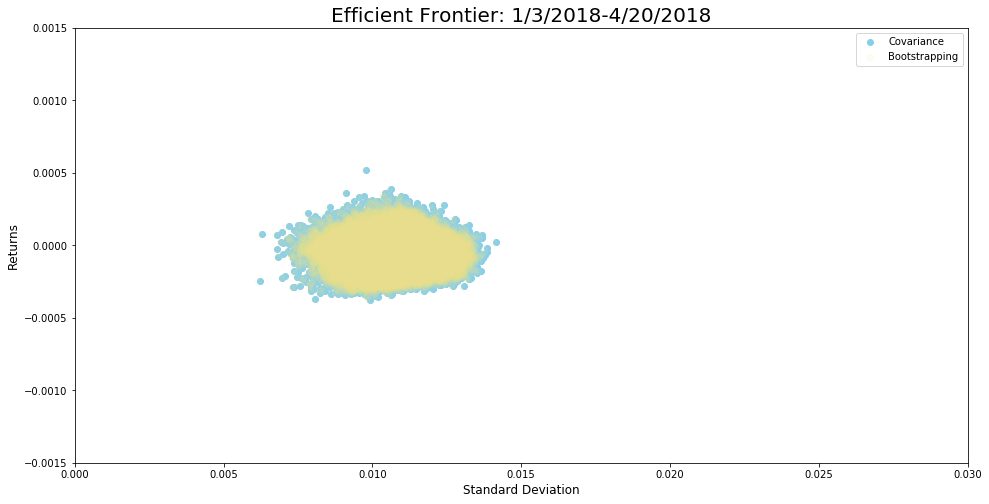

In [49]:
#Define 'Period' as a dictionary

Period_beg = ['9/28/2007', '1/4/2010', '1/4/2012', '1/3/2018']
Period_end = ['12/31/2009', '12/29/2011', '12/29/2017','4/20/2018']
columns = ['ret','stdev','sharpe'] + [i for i in col_names]
m = len(Period_beg)

for k in range(m):
    # get subperiod results
    subperiod_ret = log_return.loc[Period_beg[k]: Period_end[k]]
    ncol = len(log_ret.columns)
    col_names = log_ret.columns
    
    ## for method 1 we will need the following parameters
    mean_returns = subperiod_ret.mean()
    cov_matrix = subperiod_ret.cov()
     
    ## create two placeholders for two different methods
    num_iterations = 100000
    method1_matrix = np.zeros((3+ncol,num_iterations))
    method2_matrix = np.zeros((3+ncol,num_iterations))
    
    ## Simulation: store results into two matrices concurrently
    for i in range(num_iterations):
    #Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(ncol))
        weights /= np.sum(weights)
        
    #Method 1: return and standard deviation
        return_1 = np.sum(mean_returns * weights)
        stdev_1 = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        
        #Store all the results in a defined array
        method1_matrix[0,i] = return_1
        method1_matrix[1,i] = stdev_1
        method1_matrix[2,i] = return_1 / stdev_1
        
        #Save the weights in the array
        for x in range(len(weights)):
                method1_matrix[x+3,i] = weights[x]
                
                
    #Method 2: return and standard deviation          
        daily_ret = np.sum(subperiod_ret * weights, axis = 1)
        return_2 = np.mean(daily_ret)
        stdev_2 = np.std(daily_ret)
        
        #Store all the results in a defined array
        method2_matrix[0,i] = return_2
        method2_matrix[1,i] = stdev_2
        method2_matrix[2,i] = return_2 / stdev_2
        
        #Save the weights in the array
        for y in range(len(weights)):
                method2_matrix[y+3,i] = weights[y]
                
    #Transpose and dataframing
    df1 = pd.DataFrame(method1_matrix.T,columns=columns)
    df2 = pd.DataFrame(method2_matrix.T,columns=columns)
    
    #ScatterPlot
    
    plt.figure(num = k)
    plt.gcf().set_size_inches(16, 8)
    plt.scatter(df1.stdev,df1.ret,c='skyBlue')
    plt.scatter(df2.stdev,df2.ret,c='khaki', alpha=0.1)
    plt.xlabel('Standard Deviation', fontsize = "large")
    plt.ylabel('Returns',  fontsize = "large")
    plt.ylim(-0.0015,.0015)
    plt.xlim(0.0,0.030)
    
    plt.title('Efficient Frontier: '+ Period_beg[k] + '-' +Period_end[k], fontsize= 20)
    plt.legend(['Covariance', 'Bootstrapping', 'Covariance', '','Bootstrapping',''])
    plt.show()

## Breaking down the Code

In [6]:
#Define 'Period' as a dictionary

Period_beg = ['9/28/2007', '1/4/2010', '1/4/2012', '1/3/2018']
Period_end = ['12/31/2009', '12/29/2011', '12/29/2017','4/20/2018']

In [7]:
#Define period key i
k = 2

In [8]:
#Define subperiod data series log_ret

log_ret = log_return.loc[Period_beg[k]: Period_end[k]]
ncol = len(log_ret.columns)
col_names = log_ret.columns

In [9]:
#Calculate mean returns and covariances subperiod dataset
mean_returns = log_ret.mean()
cov_matrix = log_ret.cov()
print (mean_returns)
print('\n')
print (cov_matrix)

SPY               0.000490
IWN               0.000419
LQD               0.000045
XNTK              0.000686
XLE               0.000011
SPGSCITR Index   -0.000451
EEM               0.000124
DIA               0.000460
AAPL              0.000702
dtype: float64


                     SPY       IWN       LQD      XNTK       XLE  \
SPY             0.000058  0.000062 -0.000002  0.000062  0.000068   
IWN             0.000062  0.000091 -0.000003  0.000067  0.000079   
LQD            -0.000002 -0.000003  0.000011 -0.000002 -0.000003   
XNTK            0.000062  0.000067 -0.000002  0.000095  0.000066   
XLE             0.000068  0.000079 -0.000003  0.000066  0.000151   
SPGSCITR Index  0.000030  0.000040 -0.000002  0.000033  0.000094   
EEM             0.000067  0.000075  0.000002  0.000077  0.000091   
DIA             0.000053  0.000056 -0.000002  0.000055  0.000062   
AAPL            0.000059  0.000057 -0.000003  0.000074  0.000057   

                SPGSCITR Index       EEM       DIA      AAP

## 1st Method: use Constant Variance-Covariance to simulate efficient frontier (EF)

In [10]:
col_names

Index(['SPY', 'IWN', 'LQD', 'XNTK', 'XLE', 'SPGSCITR Index', 'EEM', 'DIA',
       'AAPL'],
      dtype='object')

In [11]:
#Set the number of iterations to 10,0000 and define a zero matrix to hold the simulation results; 
#  specifically, Mean, Standard Deviation, and Sharpe Ratio
num_iterations = 100000
simulation_res = np.zeros((3+ncol,num_iterations))

In [12]:
#Run simulation and store results of each iteration
for i in range(num_iterations):
    #Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(ncol))
        weights /= np.sum(weights)
        
    #Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        
    #Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev
        
    #Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        
    #Save the weights in the array
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [13]:
#Transpose matrix into a DataFrame
columns = ['ret','stdev','sharpe'] + [i for i in col_names]
sim_frame = pd.DataFrame(simulation_res.T,columns=columns)
sim_frame.head(2)

,ret,stdev,sharpe,SPY,IWN,LQD,XNTK,XLE,SPGSCITR Index,EEM,DIA,AAPL
0,0.000272,0.008311,0.032750,0.050194,0.055887,0.011624,0.164531,0.153085,0.146999,0.149985,0.128207,0.139488
1,0.000242,0.006811,0.035555,0.174443,0.144246,0.122109,0.057060,0.000500,0.139823,0.163877,0.183447,0.014495


#### Reporting statistics: spot Minimum-Variance portfolio and Optimal Portfolio

In [14]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]

In [15]:
#Optional: create a scatterplot of EF for this method
# plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
# # plt.figure(num = 1 ,figsize=(24,16))
# plt.gcf().set_size_inches(16, 8)
# plt.xlabel('Standard Deviation', fontsize = "large")
# plt.ylabel('Returns',  fontsize = "large")
# plt.ylim(-0.003,.00320)
# plt.xlim(0.00,0.030)

# #Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
# plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=200)

# #Plot a blue star to highlight position of the portfolio with minimum Variance
# plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=200)
# plt.show()

# 2nd Method: Bootstrapping, i.e. using historical sample for simulation

In [16]:
#Set the number of iterations to 10,0000 and define a zero matrix to hold the simulation results; 
#  specifically, Mean, Standard Deviation, and Sharpe Ratio
num_iterations = 10000
matrix = np.zeros((3+ncol,num_iterations))

In [17]:
for i in range(num_iterations):
    #Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(ncol))
        weights /= np.sum(weights)
        
    #Calculate the return and standard deviation for every step
        daily_ret = np.sum(log_ret * weights, axis = 1)
        port_mean_return = np.mean(daily_ret)
        port_std_deviation = np.std(daily_ret)
        
    #Store all the results in a defined array
        matrix[0,i] = port_mean_return
        matrix[1,i] = port_std_deviation
        
    #Calculate Sharpe ratio and store it in the array
        matrix[2,i] = matrix[0,i] / matrix[1,i]
        
    #Save the weights in the array
        for j in range(len(weights)):
                matrix[j+3,i] = weights[j]

In [18]:
#Transpose matrix into a dataframe
df_matrix = pd.DataFrame(matrix.T,columns=columns)
df_matrix.head(2)


,ret,stdev,sharpe,SPY,IWN,LQD,XNTK,XLE,SPGSCITR Index,EEM,DIA,AAPL
0,0.000165,0.007014,0.023468,0.083483,0.082252,0.159182,0.091758,0.139403,0.240425,0.007342,0.051274,0.144882
1,0.000315,0.007335,0.042912,0.153983,0.094608,0.124251,0.085485,0.112379,0.074476,0.102738,0.089790,0.162291


#### Reporting Statistics

In [19]:
#Portfolio with Max(Sharpe) anb with Min(Standard Deviation)
max_sharpe1 = df_matrix.iloc[df_matrix['sharpe'].idxmax()]
min_std1 = df_matrix.iloc[df_matrix['stdev'].idxmin()]

## Compare two methods:

In [27]:
#Compare results: Sharpe Ratio
Sharpe_comp = pd.concat([max_sharpe, max_sharpe1], axis = 1)
Sharpe_comp.columns =['Max(Sharpe) Covariance Method', 'Max(Sharpe) Bootstrapping Method']
print('Comparing Optimal Portfolio')
Sharpe_comp

Comparing Optimal Portfolio


,Max(Sharpe) Covariance Method,Max(Sharpe) Bootstrapping Method
ret,0.000428,0.000471
stdev,0.006491,0.007084
sharpe,0.065968,0.066522
SPY,0.219376,0.045429
IWN,0.139685,0.040498
LQD,0.210626,0.142285
XNTK,0.198740,0.348325
XLE,0.028132,0.053106
SPGSCITR Index,0.002459,0.014194
EEM,0.006992,0.001498


In [28]:
#Compare results: Std Dev. 
Std_Dev_comp = pd.concat([min_std, min_std1], axis = 1)
Std_Dev_comp.columns =['Min(Std) Covariance Method', 'Min(Std) Bootstrapping Method']
print('Comparing Minimum-Variance Portfolio')
Std_Dev_comp

Comparing Minimum-Variance Portfolio


,Min(Std) Covariance Method,Min(Std) Bootstrapping Method
ret,0.000171,0.000265
stdev,0.005022,0.004825
sharpe,0.034141,0.054914
SPY,0.030053,0.109501
IWN,0.007775,0.041628
LQD,0.378844,0.394841
XNTK,0.060008,0.092105
XLE,0.163064,0.029963
SPGSCITR Index,0.085287,0.022843
EEM,0.002124,0.078689


## Plot two EFs

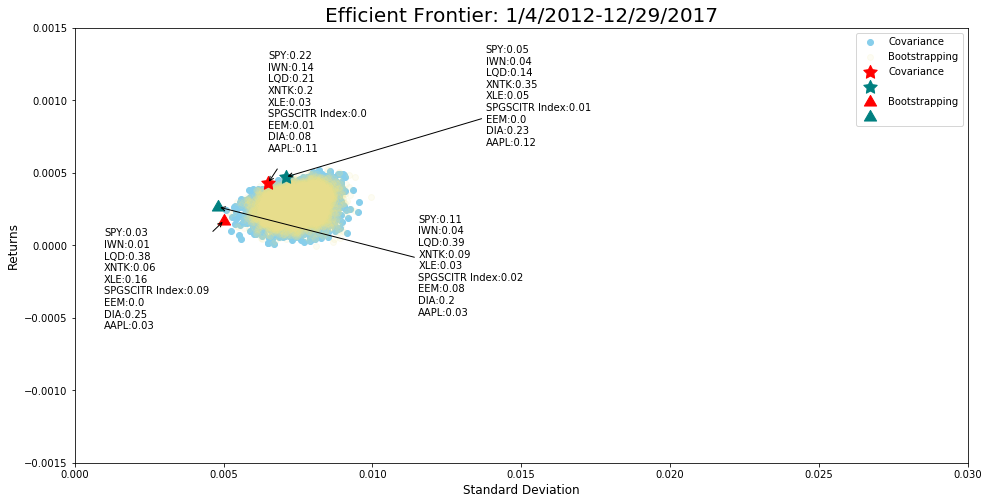

In [41]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axisplt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.figure(num = 1)
plt.gcf().set_size_inches(16, 8)
plt.scatter(sim_frame.stdev,sim_frame.ret,c='skyBlue')
plt.scatter(df_matrix.stdev,df_matrix.ret,c='khaki', alpha=0.1)
plt.xlabel('Standard Deviation', fontsize = "large")
plt.ylabel('Returns',  fontsize = "large")
plt.ylim(-0.0015,.0015)
plt.xlim(0.0,0.030)


#Plot Optimal Portfolio: Constant Covariance Method
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=200)
s = ""
for i in range(3,ncol+3):
    s+=str(max_sharpe.index[i])+':'+str(np.round(max_sharpe[i],2))+'\n'
plt.annotate(s, xy = (max_sharpe[1],max_sharpe[0]),xytext=(0, 20),
                         textcoords='offset points',arrowprops=dict(arrowstyle="->"))

#Plot Optimal Portfolio: Bootstrapping Method, with Color Teal
plt.scatter(max_sharpe1[1],max_sharpe1[0],marker=(5,1,0),color='teal',s=200)
s = ""
for i in range(3,ncol+3):
    s+=str(max_sharpe1.index[i])+':'+str(np.round(max_sharpe1[i],2))+'\n'
plt.annotate(s, xy = (max_sharpe1[1],max_sharpe1[0]),xytext=(200, 20),
                         textcoords='offset points',arrowprops=dict(arrowstyle="->"))

# Plot Min-Variance Portfolio: Constant Covariance Method
plt.scatter(min_std[1],min_std[0],marker=(3,1,0),color='r',s=200)
s = ""
for i in range(3,ncol+3):
    s+=str(min_std.index[i])+':'+str(np.round(min_std[i],2))+'\n'
plt.annotate(s, xy = (min_std[1],min_std[0]),xytext=(-120, -120),
                         textcoords='offset points',arrowprops=dict(arrowstyle="->"))



# Plot Min-Variance Portfolio: Bootstrapping Method
plt.scatter(min_std1[1],min_std1[0],marker=(3,1,0),color='teal',s=200)
s=""
for i in range(3,ncol+3):
    s+=str(min_std1.index[i])+':'+str(np.round(min_std1[i],2))+'\n'
plt.annotate(s, xy = (min_std1[1],min_std1[0]),xytext=(200, -120),
                         textcoords='offset points',arrowprops=dict(arrowstyle="->"))


plt.title('Efficient Frontier: '+ Period_beg[k] + '-' +Period_end[k], fontsize= 20)
plt.legend(['Covariance', 'Bootstrapping', 'Covariance', '','Bootstrapping',''])
plt.show()